In [3]:
!pip install nltk
!pip install twython
!pip install textblob
!pip install wordcloud

In [4]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [5]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
# Loading data set

df = pd.read_csv("/content/amazon_reviews.csv")

In [8]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


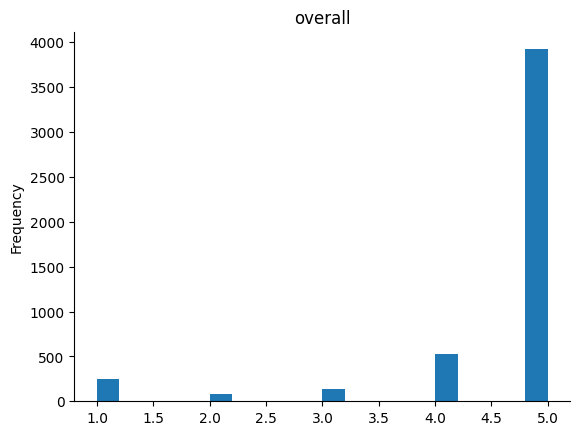

In [9]:
# @title overall

from matplotlib import pyplot as plt
df['overall'].plot(kind='hist', bins=20, title='overall')
plt.gca().spines[['top', 'right',]].set_visible(False)

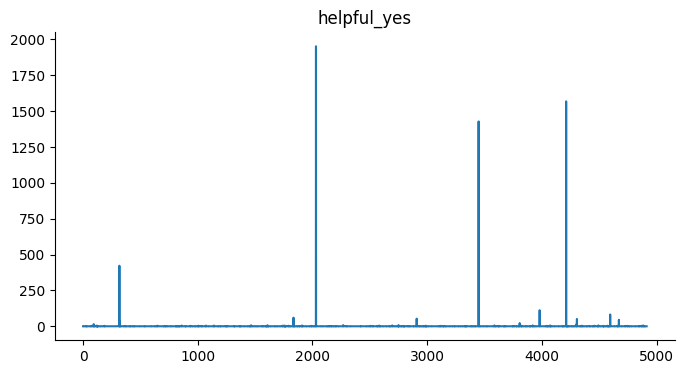

In [10]:
# @title helpful_yes

from matplotlib import pyplot as plt
df['helpful_yes'].plot(kind='line', figsize=(8, 4), title='helpful_yes')
plt.gca().spines[['top', 'right']].set_visible(False)

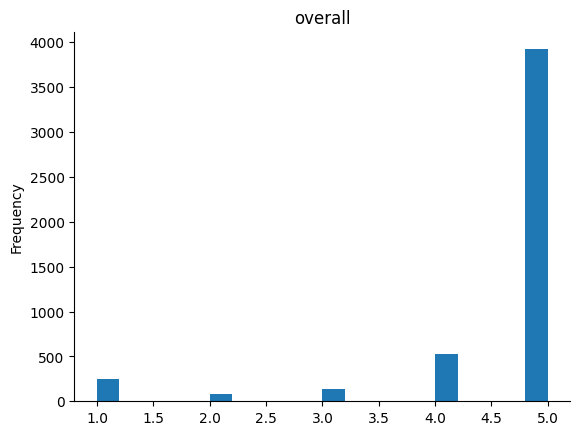

In [11]:
# @title overall

from matplotlib import pyplot as plt
df['overall'].plot(kind='hist', bins=20, title='overall')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
df['reviewText']

,reviewText
0,No issues.
1,"Purchased this for my device, it worked as adv..."
2,it works as expected. I should have sprung for...
3,This think has worked out great.Had a diff. br...
4,"Bought it with Retail Packaging, arrived legit..."
...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...
4911,Used this for extending the capabilities of my...
4912,Great card that is very fast and reliable. It ...
4913,Good amount of space for the stuff I want to d...


In [13]:
df['reviewText'] = df['reviewText'].str.lower()

In [14]:
df['reviewText']

,reviewText
0,no issues.
1,"purchased this for my device, it worked as adv..."
2,it works as expected. i should have sprung for...
3,this think has worked out great.had a diff. br...
4,"bought it with retail packaging, arrived legit..."
...,...
4910,i bought this sandisk 16gb class 10 to use wit...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable. it ...
4913,good amount of space for the stuff i want to d...


In [15]:
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '', regex=True)

In [16]:
df['reviewText']

,reviewText
0,no issues
1,purchased this for my device it worked as adve...
2,it works as expected i should have sprung for ...
3,this think has worked out greathad a diff bran...
4,bought it with retail packaging arrived legit ...
...,...
4910,i bought this sandisk 16gb class 10 to use wit...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable it c...
4913,good amount of space for the stuff i want to d...


In [17]:
df['reviewText'] = df['reviewText'].str.replace('\d', '', regex=True)

In [18]:
df['reviewText']

,reviewText
0,no issues
1,purchased this for my device it worked as adve...
2,it works as expected i should have sprung for ...
3,this think has worked out greathad a diff bran...
4,bought it with retail packaging arrived legit ...
...,...
4910,i bought this sandisk gb class to use with my...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable it c...
4913,good amount of space for the stuff i want to d...


In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
sw = stopwords.words('english')

In [22]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [24]:
df['reviewText']

,reviewText
0,issues
1,purchased device worked advertised never much ...
2,works expected sprung higher capacity think ma...
3,think worked greathad diff bran gb card went s...
4,bought retail packaging arrived legit orange e...
...,...
4910,bought sandisk gb class use htc inspire months...
4911,used extending capabilities samsung galaxy not...
4912,great card fast reliable comes optional adapte...
4913,good amount space stuff want fits gopro say


In [25]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()

In [26]:
temp_df

,count
card,4603
gb,1725
phone,1685
works,1559
great,1445
...,...
outmoded,1
stocking,1
cardsso,1
requirement,1


In [27]:
drops = temp_df[temp_df <= 1]

In [28]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [29]:
df['reviewText']

,reviewText
0,issues
1,purchased device worked advertised never much ...
2,works expected higher capacity think made bit ...
3,think worked gb card went south one held prett...
4,bought retail packaging arrived legit envelope...
...,...
4910,bought sandisk gb class use htc inspire months...
4911,used capabilities samsung galaxy note greatly ...
4912,great card fast reliable comes optional adapte...
4913,good amount space stuff want fits gopro say


In [30]:
temp_df_1 = pd.Series(' '.join(df['reviewText']).split()).value_counts()

In [31]:
temp_df_1

,count
card,4603
gb,1725
phone,1685
works,1559
great,1445
...,...
exceeds,2
embedded,2
errori,2
anime,2


In [32]:
pip install textblob

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

,reviewText
0,[issues]
1,"[purchased, device, worked, advertised, never,..."
2,"[works, expected, higher, capacity, think, mad..."
3,"[think, worked, gb, card, went, south, one, he..."
4,"[bought, retail, packaging, arrived, legit, en..."


In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [37]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [38]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [39]:
df['reviewText']

,reviewText
0,issue
1,purchased device worked advertised never much ...
2,work expected higher capacity think made bit e...
3,think worked gb card went south one held prett...
4,bought retail packaging arrived legit envelope...
...,...
4910,bought sandisk gb class use htc inspire month ...
4911,used capability samsung galaxy note greatly ex...
4912,great card fast reliable come optional adapter...
4913,good amount space stuff want fit gopro say


In [40]:
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [41]:
tf.columns = ['words', 'tf']

In [42]:
tf_sorted = tf.sort_values(by='tf', ascending=False)

In [43]:
tf_sorted

,words,tf
27,card,5537.00
14,work,2044.00
7,phone,1909.00
28,gb,1756.00
91,great,1445.00
...,...,...
3666,problemi,2.00
3667,deliberately,2.00
3669,disappearing,2.00
3670,zenfolio,2.00


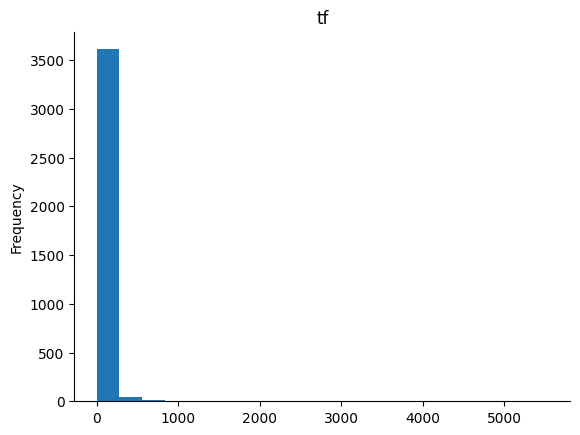

In [44]:
# @title tf

from matplotlib import pyplot as plt
tf_sorted['tf'].plot(kind='hist', bins=20, title='tf')
plt.gca().spines[['top', 'right',]].set_visible(False)

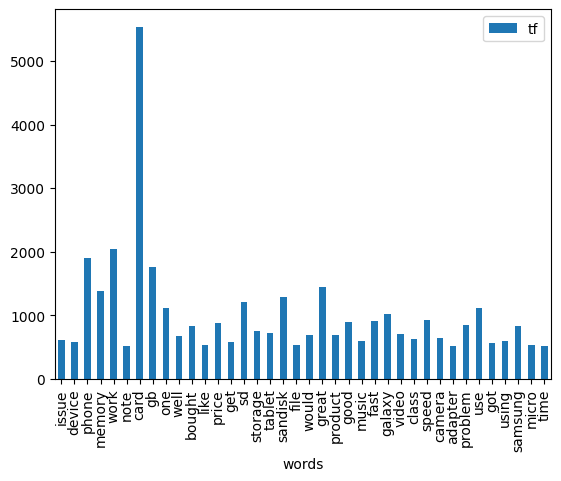

In [45]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show(block=True)

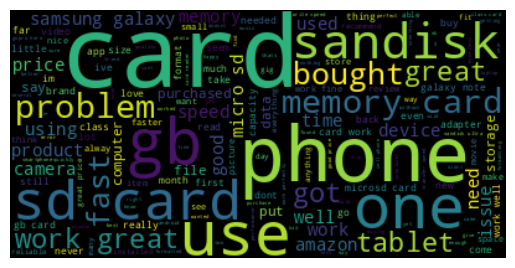

In [46]:
text = " ".join(i for i in df.reviewText)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

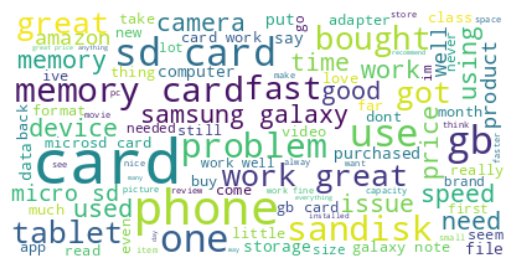

In [47]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

In [48]:
pip install numpy pillow wordcloud matplotlib

In [49]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [50]:
df["reviewText"].head()

,reviewText
0,issue
1,purchased device worked advertised never much ...
2,work expected higher capacity think made bit e...
3,think worked gb card went south one held prett...
4,bought retail packaging arrived legit envelope...


In [51]:
sia = SentimentIntensityAnalyzer()

In [52]:
sia.polarity_scores("The film was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

**'compound': 0.6249**

In [53]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

**'compound': -0.298**

In [54]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

,reviewText
0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp..."
3,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp..."
4,"{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp..."
5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,"{'neg': 0.108, 'neu': 0.598, 'pos': 0.295, 'co..."
7,"{'neg': 0.077, 'neu': 0.65, 'pos': 0.272, 'com..."
8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,"{'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp..."


In [55]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

,reviewText
0,0.00
1,0.00
2,0.40
3,0.65
4,0.86
5,0.00
6,0.87
7,0.82
8,0.00
9,0.92


In [56]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [57]:
df.head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",mini storage doesnt anything else supposed pur...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0,0.00
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",phone never skip beat file transfer speedy cor...,5.00,Works well,1382140800,2013-10-19,415,0,0,0.87
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",hard believe affordable digital become gb devi...,5.00,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0,0.82
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",work htc rezound running short space gb sandis...,5.00,Loads of room,1395619200,2014-03-24,259,1,1,0.00
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]",galaxy super fast card totally happy happy sti...,5.00,works great,1381449600,2013-11-10,393,0,0,0.92


In [58]:
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

,reviewText
0,neg
1,neg
2,pos
3,pos
4,pos
5,neg
6,pos
7,pos
8,neg
9,pos


In [59]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [60]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,neg
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,pos
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,pos


In [61]:
df["sentiment_label"].value_counts()

,count
sentiment_label,
pos,3944
neg,971


In [62]:
df.groupby("sentiment_label")["overall"].mean()

,overall
sentiment_label,
neg,4.09
pos,4.71


In [63]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [64]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,1
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,1
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,1


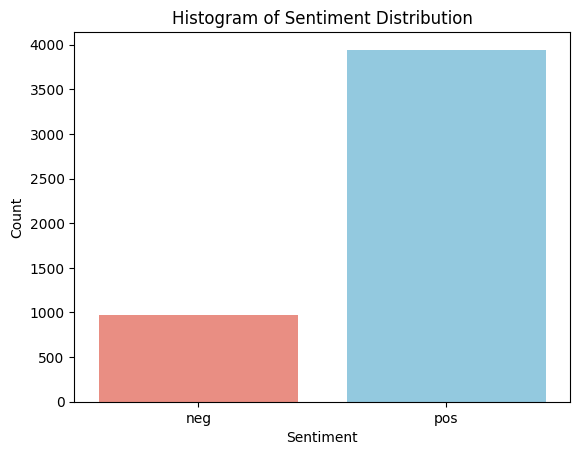

In [65]:
# Map 0 to 'neg' and 1 to 'pos'
df['sentiment_label'] = df['sentiment_label'].map({0: 'neg', 1: 'pos'})

# Plot the histogram using seaborn
sns.countplot(x='sentiment_label', data=df, palette=['salmon', 'skyblue'])

# Add title and labels
plt.title('Histogram of Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the plot
plt.show()


In [66]:
y = df["sentiment_label"] # dependent variable

In [67]:
X = df["reviewText"] # independent variable

**Word Frequency**

In [68]:
vectorizer = CountVectorizer()

In [69]:
X_count = vectorizer.fit_transform(X)

In [70]:
vectorizer.get_feature_names_out()[10:15]

array(['access', 'accessed', 'accessible', 'accessing', 'accessory'],
      dtype=object)

In [71]:
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**N-Gram Frequency**

In [73]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [74]:
X_n = vectorizer2.fit_transform(X)

In [75]:
vectorizer2.get_feature_names_out()[10:15]

array(['ability put', 'ability sandisk', 'ability something',
       'ability stick', 'ability store'], dtype=object)

In [76]:
X_n.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Word**

In [77]:
tf_idf_word_vectorizer = TfidfVectorizer()

In [78]:
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [79]:
print(X_tf_idf_word.shape)  # Print the shape of the TF-IDF matrix
print(tf_idf_word_vectorizer.get_feature_names_out()[10:15])  # Print a subset of feature names

(4915, 3665)
['access' 'accessed' 'accessible' 'accessing' 'accessory']


In [80]:
print(X_tf_idf_word.toarray())  # Convert to dense format (use with caution for large matrices)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**N-Gram**

In [81]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))

In [82]:
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

In [83]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)

In [84]:
cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

0.830111902339776

In [85]:
new_review = pd.Series("this product is great")

In [86]:
new_review = pd.Series("look at that shit very bad")

In [87]:
new_review = pd.Series("it was good but I am sure that it fits me")

In [88]:
new_review = TfidfVectorizer().fit(X).transform(new_review)

In [89]:
log_model.predict(new_review)

array(['pos'], dtype=object)

In [90]:
random_review = pd.Series(df["reviewText"].sample(1).values)

In [91]:
new_review = TfidfVectorizer().fit(X).transform(random_review)

In [92]:
log_model.predict(new_review)

array(['pos'], dtype=object)

In [93]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.8402848423194303

In [94]:
# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8301119023397762

In [231]:
# TF-IDF N-GRAM
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

1.0

In [96]:
rf_model = RandomForestClassifier(random_state=17)

In [97]:
rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]}

In [98]:
rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [99]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

In [100]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)

In [101]:
cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()

0.8130213631739572

DEEP LEARNING MODEL

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [128]:
texts = df['reviewText'].astype(str).tolist()
labels = df['sentiment_label'].astype(int).tolist()

In [129]:
# Initialize tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=100)

In [130]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [131]:
import numpy as np
y = np.array(labels)

# Train the model
model.fit(X, y, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9850 - loss: 0.1085 - val_accuracy: 1.0000 - val_loss: 1.0882e-04
Epoch 2/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 1.0000 - loss: 1.0418e-04 - val_accuracy: 1.0000 - val_loss: 6.4637e-05
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 6.3568e-05 - val_accuracy: 1.0000 - val_loss: 4.4578e-05
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 4.4266e-05 - val_accuracy: 1.0000 - val_loss: 3.3719e-05
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 1.0000 - loss: 3.3587e-05 - val_accuracy: 1.0000 - val_loss: 2.6579e-05


In [144]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load pre-trained BERT model with a classification head
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Move model to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [243]:
# # Define training arguments
# training_args = TrainingArguments(
#     output_dir='./results',              # Output directory
#     num_train_epochs=1,                  # Number of training epochs (adjust as needed)
#     per_device_train_batch_size=8,       # Batch size for training
#     per_device_eval_batch_size=8,        # Batch size for evaluation
#     warmup_steps=500,                    # Number of warmup steps for learning rate scheduler
#     weight_decay=0.01,                   # Strength of weight decay
#     logging_dir='./logs',                # Directory for storing logs
#     logging_steps=10,
#     evaluation_strategy='steps',         # Evaluation strategy
#     save_strategy='steps',               # Saving strategy
#     save_steps=500,                      # Save model checkpoint every 500 steps
#     load_best_model_at_end=True,         # Load the best model at the end of training
#     metric_for_best_model='accuracy'     # Metric to monitor for early stopping
# )

# # Define Trainer with EarlyStoppingCallback
# trainer = Trainer(
#     model=model,                         # The model to be trained
#     args=training_args,                  # Training arguments
#     train_dataset=train_dataset,         # Training dataset
#     eval_dataset=val_dataset,            # Evaluation dataset
#     callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]  # Early stopping callback
# )

# # Train the model
# trainer.train()


In [255]:
import pandas as pd
from transformers import BertTokenizer
from torch.utils.data import Dataset

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define tokenization and dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encodings = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length, return_tensors='pt')
        return {
            'input_ids': encodings['input_ids'].squeeze(),
            'attention_mask': encodings['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Split data
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['reviewText'].tolist(), df['sentiment_label'].tolist(), test_size=0.2, random_state=42
)

# Create datasets
train_dataset = CustomDataset(train_texts, train_labels, tokenizer)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer)

In [258]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',              # Output directory
    num_train_epochs=1,                  # Number of training epochs (adjust as needed)
    per_device_train_batch_size=8,       # Batch size for training
    per_device_eval_batch_size=8,        # Batch size for evaluation
    warmup_steps=500,                    # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,                   # Strength of weight decay
    logging_dir='./logs',                # Directory for storing logs
    logging_steps=10,
    evaluation_strategy='steps',         # Evaluation strategy
    save_strategy='steps',               # Saving strategy
    save_steps=500,                      # Save model checkpoint every 500 steps
    load_best_model_at_end=True,         # Load the best model at the end of training
    metric_for_best_model='accuracy'     # Metric to monitor for early stopping
)

# Define Trainer
trainer = Trainer(
    model=model,                         # The model to be trained
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
    eval_dataset=val_dataset             # Evaluation dataset
)

# Train the model
train_results = trainer.train()

# Save the trainer state
trainer_state = trainer.state

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss
10,0.685800,0.672188
20,0.628300,0.565697
30,0.517500,0.451054
40,0.407300,0.315048
50,0.257100,0.161510
60,0.129700,0.065464
70,0.050100,0.026111
80,0.023400,0.011815
90,0.011000,0.006334
100,0.006500,0.004066


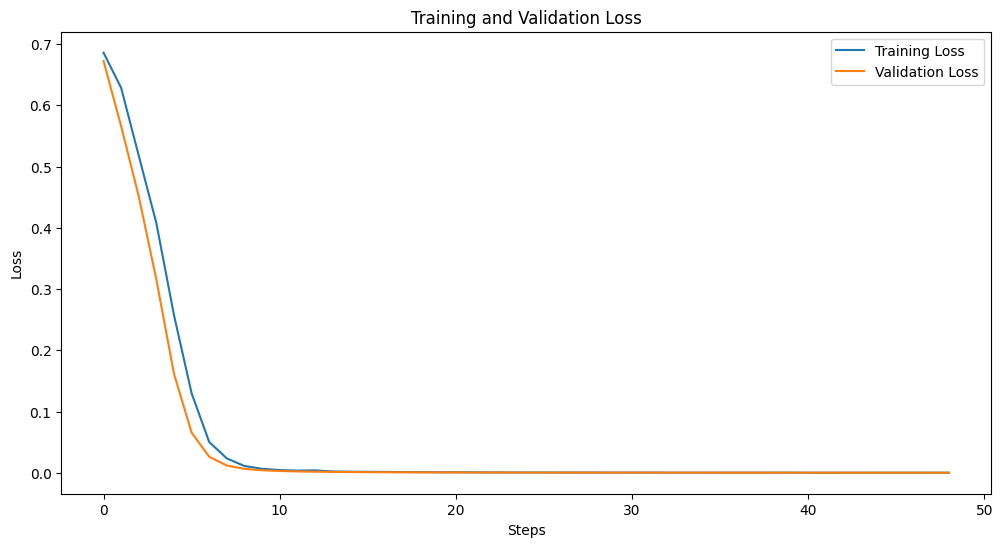

In [260]:
import matplotlib.pyplot as plt

# Extract logs
log_history = trainer.state.log_history

# Extract loss and accuracy
train_losses = [entry['loss'] for entry in log_history if 'loss' in entry]
eval_losses = [entry['eval_loss'] for entry in log_history if 'eval_loss' in entry]
eval_accuracies = [entry['eval_accuracy'] for entry in log_history if 'eval_accuracy' in entry]

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(eval_losses, label='Validation Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [262]:
def tokenize_data(texts, tokenizer, max_length=128):
    return tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')

# Function to make predictions
def predict(texts, model, tokenizer):
    encodings = tokenize_data(texts, tokenizer)
    inputs = {key: torch.tensor(val).to(device) for key, val in encodings.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)
    return predictions

new_texts = ["I absolutely love this product!", "This is the worst thing I have ever bought.", "I hate this product"]
true_labels = [1, 0, 0]  # Replace with the actual labels for your test data
predictions = predict(new_texts, model, tokenizer)

# Print predictions
print("Predictions:", predictions.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions.cpu().numpy())
print("Accuracy:", accuracy)

Predictions: [0 0 0]
Accuracy: 0.6666666666666666
